In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/struct2depth
#%cd /content/gdrive/My\ Drive/Accident_Anticipation/Anticipating-Accidents/dataset/videos/frames/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/struct2depth


In [0]:
!git clone https://github.com/tensorflow/models.git
# !dir
# git checkout -b subbranch origin/subbranch 

Cloning into 'models'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 32151 (delta 41), reused 52 (delta 12), pack-reused 32055
Receiving objects: 100% (32151/32151), 511.28 MiB | 15.17 MiB/s, done.
Resolving deltas: 100% (20348/20348), done.
Checking out files: 100% (3134/3134), done.


In [0]:
!pwd

/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/google_dist_code_1/google-research


In [0]:
# pip install --upgrade scikit-image

In [0]:
!set -e
!set -x

!virtualenv -p python3 .
!source ./bin/activate

!pip install tensorflow
!pip install tensorflow-graphics
!pip install -r depth_from_video_in_the_wild/requirements.txt

/bin/bash: virtualenv: command not found
/bin/bash: ./bin/activate: No such file or directory
     |████████████████████████████████| 245kB 4.9MB/s 
     |████████████████████████████████| 28.7MB 74kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.7.28
    Uninstalling opencv-python-3.4.7.28:
      Successfully uninstalled opencv-python-3.4.7.28


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from absl import logging

import tensorflow as tf
from depth_from_video_in_the_wild import model


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
import os
print(os.listdir('./depth_from_video_in_the_wild/'))

['README.md', '__init__.py', 'consistency_losses.py', 'data_example', 'depth_prediction_net.py', 'model.py', 'motion_prediction_net.py', 'randomized_layer_normalization.py', 'reader.py', 'requirements.txt', 'run.sh', 'train.py', 'trajectory_inference.py', 'transform_depth_map.py', 'transform_utils.py', '__pycache__', 'depth_cp_2']


In [0]:
saver = tf.train.import_meta_graph('depth_from_video_in_the_wild/depth_cp_2/model-1000977.meta')

In [0]:
tf.reset_default_graph() 

DepthModel = model.Model(data_dir='depth_from_video_in_the_wild/data_example' ,is_training=True)

saver  = DepthModel.saver

# saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, save_path = 'depth_from_video_in_the_wild/depth_cp_2/model-1000977')

INFO:tensorflow:Restoring parameters from depth_from_video_in_the_wild/depth_cp_2/model-1000977


INFO:tensorflow:Restoring parameters from depth_from_video_in_the_wild/depth_cp_2/model-1000977


In [0]:
new_output = output[0][:,:,0:416,:]
new_output = np.concatenate((new_output,new_output,new_output,new_output),axis=0)
print(new_output.shape)

(4, 128, 416, 3)


In [0]:
Depth_inference = model.Model(is_training=False)
output = Depth_inference.inference_depth(new_output, sess)

INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


(4, 128, 416, 1)


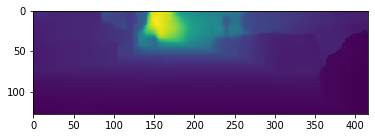

In [0]:
print(output.shape)
import matplotlib.pyplot as plt
# plt.imshow()
plt.imshow(output[0][:,:,0])

In [0]:
print(os.listdir('./depth_from_video_in_the_wild/data_example/erfurt_93/0000000002.png'))


['0000000002-fseg.png', '0000000002.png', '0000000002_cam.txt']


In [0]:
def load_images(image_files):
    from skimage.transform import resize
    loaded_images = []
    for file in image_files:
        x = np.clip(np.asarray(Image.open( file ), dtype=float) / 255, 0, 1)

#         if x.shape[0]%32 != 0 or x.shape[1]%32 != 0:
# #             output_shape = x.shape
# #             output_shape[0] = output_shape[0] + x.shape[0]%32
# #             output_shape[1] = output_shape[1] + x.shape[1]%32  
#             output_shape = [x.shape[0]-x.shape[0]%32,x.shape[1]-x.shape[1]%32,x.shape[2]]
#             x = resize(x, output_shape, order=1, preserve_range=True, mode='reflect', anti_aliasing=True )
#         #print('Changed to: ' + str(x.shape))
        ###########################################
        loaded_images.append(x)
        
    output = list()
    output.append(np.stack(loaded_images, axis=0))
    output.append(np.clip(np.asarray(Image.open( file ), dtype=float) / 255, 0, 1).shape)
    return output

In [0]:
import numpy as np
from PIL import Image
image_files = list()
image_files.append('./depth_from_video_in_the_wild/data_example/erfurt_93/0000000002.png')
output = load_images(image_files)
image_tens = tf.convert_to_tensor(output[0])

In [0]:
print(image_tens.shape)

(1, 128, 1248, 3)


In [0]:

DepthModel.inference_depth(image_tens,sess)

AttributeError: ignored

In [0]:
!python -m depth_from_video_in_the_wild.train \
!  --data_dir=depth_from_video_in_the_wild/data_example \
!  --checkpoint_dir=depth_from_video_in_the_wild/depth_cp_2 --train_steps=1

/usr/local/lib/python3.6/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


W1109 23:48:18.489868 140255664764800 module_wrapper.py:139] From /content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/google_dist_code_1/google-research/depth_from_video_in_the_wild/train.py:130: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.


W1109 23:48:18.490849 140255664764800 module_wrapper.py:139] From /conten

In [0]:
DepthModel = model.Model(is_training=False)#is_training=False) #,img_height=720,img_width=1080,)

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Use `tf.cast` instead.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


In [0]:
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, save_path = 'depth_model/model-1000977')

INFO:tensorflow:Restoring parameters from depth_model/model-1000977


INFO:tensorflow:Restoring parameters from depth_model/model-1000977


In [0]:
DepthModel

In [0]:
!dir

depth_from_video_in_the_wild  google-research
depth_model		      kitti_learned_intrinsics
google_distance_code.ipynb


In [0]:
saver = train_model.saver
sv = tf.train.Supervisor(logdir=checkpoint_dir, save_summaries_secs=0,
                          saver=None)
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with sv.managed_session(config=config) as sess:
  logging.info('Attempting to resume training from %s...', checkpoint_dir)
  checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
  logging.info('Last checkpoint found: %s', checkpoint)
  if checkpoint:
    saver.restore(sess, checkpoint)
  elif FLAGS.imagenet_ckpt:
    logging.info('Restoring pretrained weights from %s', FLAGS.imagenet_ckpt)
    train_model.imagenet_init_restorer.restore(sess, FLAGS.imagenet_ckpt)

In [0]:
saver = tf.train.Saver()
saver.restore(sess, 'depth_model/model-1000977')

In [0]:
inference_model = model.Model(
    is_training=False)
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, save_path = 'depth_model/model-1000977')

In [0]:
inference_model = model_3.Model(
    is_training=False)
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, save_path = 'odometry_model/checkpoint/model-413174')

INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Restoring parameters from odometry_model/checkpoint/model-413174


INFO:tensorflow:Restoring parameters from odometry_model/checkpoint/model-413174


NotFoundError: ignored

In [0]:
inference_model = model.Model(
    is_training=False)
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, save_path = 'kitti_learned_intrinsics/model-248900')


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Restoring parameters from kitti_learned_intrinsics/model-248900


INFO:tensorflow:Restoring parameters from kitti_learned_intrinsics/model-248900


NotFoundError: ignored

In [0]:
inference_model = model.Model(
    is_training=False,
    batch_size=1)
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, save_path = 'depth_model/model-1000977')


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Restoring parameters from depth_model/model-1000977


INFO:tensorflow:Restoring parameters from depth_model/model-1000977


NotFoundError: ignored

In [0]:
import os
import glob
import argparse
import matplotlib
import re
import numpy as np
import time

# Keras / TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
from keras.models import load_model
from layers import BilinearUpSampling2D
from utils import predict, load_images, display_images
from matplotlib import pyplot as plt
from utils_1 import to_multichannel, resize_outputs, scale_up, scale_up_2

Using TensorFlow backend.


In [0]:
# # Argument Parser
# parser = argparse.ArgumentParser(description='High Quality Monocular Depth Estimation via Transfer Learning')
# parser.add_argument('--model', default='nyu.h5', type=str, help='Trained Keras model file.')
# parser.add_argument('--input', default='examples/*.jpg', type=str, help='Input filename or folder.')
# parser.add_argument('--output', default = 'output', type =str, help='Name of output directory')
# args = parser.parse_args()

args_model ='kitti.h5'

# Custom object needed for inference and training
custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}

print('Loading model...')

# Load model into GPU / CPU

model = load_model(args_model, custom_objects=custom_objects, compile=False)
print('\nModel loaded ({0}).'.format(args_model))

# random functions
def obtain_keys(lis):
    key_ls = list()
    for k in lis:
        integer = re.split('([0-9]+)', k)[1]
        key_ls.append(int(integer))
    return(key_ls)
  
def obtain_keys1(lis):
    key_ls = list()
    for k in lis:
        integer = re.split('([0-9]+)', k)[3]
        key_ls.append(int(integer))
    return(key_ls)
  
def h(seq):
    return sorted(range(len(seq)), key=seq.__getitem__)
  
def sort_dir(lis):
    key_ls = h(obtain_keys(lis))
    return [lis[i] for i in key_ls]
  
  
def load_images(image_files):
    from skimage.transform import resize
    loaded_images = []
    for file in image_files:
        x = np.clip(np.asarray(Image.open( file ), dtype=float) / 255, 0, 1)

        if x.shape[0]%32 != 0 or x.shape[1]%32 != 0:
#             output_shape = x.shape
#             output_shape[0] = output_shape[0] + x.shape[0]%32
#             output_shape[1] = output_shape[1] + x.shape[1]%32  
            output_shape = [x.shape[0]-x.shape[0]%32,x.shape[1]-x.shape[1]%32,x.shape[2]]
            x = resize(x, output_shape, order=1, preserve_range=True, mode='reflect', anti_aliasing=True )
        #print('Changed to: ' + str(x.shape))
        ###########################################
        loaded_images.append(x)
        
    output = list()
    output.append(np.stack(loaded_images, axis=0))
    output.append(np.clip(np.asarray(Image.open( file ), dtype=float) / 255, 0, 1).shape)
    return output

Loading model...


W0902 15:20:16.941944 140505281996672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 15:20:17.060245 140505281996672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0902 15:20:17.107629 140505281996672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 15:20:17.108756 140505281996672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0902 15:20:17.113160 1405052819


Model loaded (kitti.h5).


In [0]:
str1 = ['training', 'testing']
str2 = ['positive','negative']

## three for loops, make outfile


for a1 in str1:
  for a2 in str2:
    
    root_path = '/content/gdrive/My Drive/Accident_Anticipation/Anticipating-Accidents/dataset/videos/frames/'
    dir_list = sort_dir(os.listdir(root_path+a1+'/'+a2+'/'))
    output_root = './outputs/'+a1+'/'+a2+'/'
    
    for a3 in dir_list:
      # Check which files were already created
      existing_list = sort_dir(os.listdir(output_root))
      curr_file = a3 + '.npz'
      
      if (curr_file in existing_list):
        pass
      
      else:
        print(a1, a2,a3)
        start_time = time.time()
        #print(a3)
        args_input = root_path+a1+'/'+a2+'/'+a3+'/*.jpg'
        args_output = output_root+a3+'.npz'
        files_list = glob.glob(args_input)
        start_time = time.time()

        sort_keys = h(obtain_keys1(files_list))
        r_files_list = [files_list[i] for i in sort_keys]
        
        print(r_files_list)

        # Input images
        output_list = load_images( r_files_list )
        inputs = output_list[0]
        x_shape = output_list[1]
        #print(inputs.shape)
        #print(x_shape)
        print('\nLoaded ({0}) images of size {1}.'.format(inputs.shape[0], inputs.shape[1:]))

        # Compute results
        outputs = predict(model, inputs)

        outputs2 = scale_up(2,outputs)
        outputs_final = scale_up_2(x_shape[0],x_shape[1],outputs2)

        #### make code to save npy file in specified directory
        np.savez(args_output , distance=outputs_final)

        print('Saved file :' + str(args_output))

        print(time.time() - start_time)

print(a1)

testing
